## Final Project Submission

Please fill out:
* Student name: Group 6(Billion Dollar club)
* Student pace: Part time
* Scheduled project review date/time: 09/06/2025
* Instructor name: Samuel G. Mwangi
* Blog post URL:


# Business Understanding
Business Understanding: Movie Business Launch
This project focuses on providing data-driven insights to a new movie studio to guide our initial strategy and maximize our chances of success in the competitive film industry. The core objective is to identify profitable opportunities and establish a strong foundation for the studio's future.

## The Business Problem

The movie studio faces the significant challenge of entering a mature yet highly dynamic industry. Without an established track record or deep market knowledge, they risk making costly decisions on movie production, target audiences, and release strategies. The primary business problems are:

- High Investment Risk: Film production requires substantial capital, and a single unsuccessful film can severely impact a new studio's viability.
- Lack of Market Insight: Identifying what makes a movie financially successful (e.g., genre, budget, runtime, critical reception, audience popularity) is complex.
- Strategic Decision-Making: We need a clear, data-backed strategy for:
   - What types of movies to produce (genres, themes).
   - Optimal budget allocation.
   - Targeting specific audience segments.
   - Understanding the competitive landscape.

Our company wants to start a movie studio and create original content that performs well at the box office.

Our aim is to analyze:
- What types of movies perform best commercially
- Key patterns in genres, production companies, release months, and runtime
- Ratings from Rotten Tomatoes and IMDb

## Business Goal
Generate **3 data-driven recommendations** to help determine:
- What types of movies are most likely to succeed
- When is the best time to release a movie
- What characteristics (e.g. genre, runtime, ratings) are associated with higher earnings


## Data Sources

We are using data from the following sources:

- **Box Office Mojo**: Revenue figures for US releases (`bom.movie_gross.csv.gz`)
- **TMDb**: Metadata and ratings stored in a SQLite database (`im.db`)
- **Rotten Tomatoes**: TSV file of movie reviews (`rt.reviews.tsv`)
- **The Numbers**: Production budgets and revenue (`tn.movie_budgets.csv`

By integrating and analyzing these diverse datasets, this project aims to deliver concrete, data-driven recommendations that will empower our company to launch the movie business with a competitive edge and a higher probability of success.


### STEP 1: **Loading and exploring the relevant Data sets**

In [1]:
# Imports
import pandas as pd
import sqlite3
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading  and Cleaning Box Office Mojo Data

In [2]:
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom.info()
bom.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [1063]:
bom.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [1064]:
# Remove commas and convert to numeric
bom["domestic_gross"] = pd.to_numeric(bom["domestic_gross"], errors='coerce')
bom["foreign_gross"] = pd.to_numeric(bom["foreign_gross"], errors='coerce')

# Calculate worldwide gross
bom["worldwide_gross"] = bom["domestic_gross"] + bom["foreign_gross"]


In [1065]:
# Format all float values to show commas and remove scientific notation
pd.options.display.float_format = '{:,.0f}'.format

# Preview formatted output
bom[["title", "domestic_gross", "foreign_gross", "worldwide_gross"]].head(10)


,title,domestic_gross,foreign_gross,worldwide_gross
0,Toy Story 3,"415,000,000","652,000,000","1,067,000,000"
1,Alice in Wonderland (2010),"334,200,000","691,300,000","1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,"296,000,000","664,300,000","960,300,000"
3,Inception,"292,600,000","535,700,000","828,300,000"
4,Shrek Forever After,"238,700,000","513,900,000","752,600,000"
5,The Twilight Saga: Eclipse,"300,500,000","398,000,000","698,500,000"
6,Iron Man 2,"312,400,000","311,500,000","623,900,000"
7,Tangled,"200,800,000","391,000,000","591,800,000"
8,Despicable Me,"251,500,000","291,600,000","543,100,000"
9,How to Train Your Dragon,"217,600,000","277,300,000","494,900,000"


In [1066]:
# Drop missing titles
bom = bom.dropna(subset=["title"])


In [1067]:
#Preview Cleaned Box Office Mojo Dataset
bom.head(10)


,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,"415,000,000","652,000,000",2010,"1,067,000,000"
1,Alice in Wonderland (2010),BV,"334,200,000","691,300,000",2010,"1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000","664,300,000",2010,"960,300,000"
3,Inception,WB,"292,600,000","535,700,000",2010,"828,300,000"
4,Shrek Forever After,P/DW,"238,700,000","513,900,000",2010,"752,600,000"
5,The Twilight Saga: Eclipse,Sum.,"300,500,000","398,000,000",2010,"698,500,000"
6,Iron Man 2,Par.,"312,400,000","311,500,000",2010,"623,900,000"
7,Tangled,BV,"200,800,000","391,000,000",2010,"591,800,000"
8,Despicable Me,Uni.,"251,500,000","291,600,000",2010,"543,100,000"
9,How to Train Your Dragon,P/DW,"217,600,000","277,300,000",2010,"494,900,000"


#### Loading Rotten Tomatoes Reviews

In [1068]:
rt = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t", encoding='latin1')
rt.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### Loading, Cleaning and connecting to the TMDB SQLITE Database

In [1069]:
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall("zippedData/")

conn = sqlite3.connect("zippedData/im.db")
(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn))



,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [1070]:
# Load and preview key tables
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)


In [1071]:
print(movie_basics.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013              175    Action,Crime,Drama  
1        2019              114       Biography,Drama  
2        2018              122                 Drama  
3        2018              nan          Comedy,Drama  
4        2017               80  Comedy,Drama,Fantasy  


In [1072]:
print(movie_ratings.head())

     movie_id  averagerating  numvotes
0  tt10356526              8        31
1  tt10384606              9       559
2   tt1042974              6        20
3   tt1043726              4     50352
4   tt1060240              6        21


In [1073]:
#Merge the two tables (Movie basics and Movie ratings on Movie ID
tmdb = pd.merge(movie_basics, movie_ratings, on="movie_id")
print(tmdb.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013              175    Action,Crime,Drama              7        77  
1        2019              114       Biography,Drama              7        43  
2        2018              122                 Drama              7      4517  
3        2018              nan          Comedy,Drama              6        13  
4        2017               80  Comedy,Drama,Fantasy              6       119  


In [1074]:
# Check column names and data types
tmdb.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [1075]:
# Count missing values
tmdb.isnull().sum()


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [1076]:
# Creat a clean copy and Drop rows with missing values in key columns

tmdb_clean = imdb.dropna(subset=["averagerating", "runtime_minutes", "genres"]).copy()


In [1077]:
# Convert runtime to numerics

tmdb_clean.loc[:, "runtime_minutes"] = pd.to_numeric(imdb_clean["runtime_minutes"], errors='coerce')

In [1078]:
# Keep only the first genre
tmdb_clean["primary_genre"] = imdb_clean["genres"].str.split(",").str[0]


In [1079]:
#preview final cleaned IMDB Dataset
tmdb_clean[["primary_title", "start_year", "primary_genre", "runtime_minutes", "averagerating", "numvotes"]].head()


,primary_title,start_year,primary_genre,runtime_minutes,averagerating,numvotes
0,Sunghursh,2013,Action,175,7,77
1,One Day Before the Rainy Season,2019,Biography,114,7,43
2,The Other Side of the Wind,2018,Drama,122,7,4517
4,The Wandering Soap Opera,2017,Comedy,80,6,119
6,Joe Finds Grace,2017,Adventure,83,8,263


### Merging TMDB with Box Office Mojo Data(Ratings + Revenue)

In [1080]:
# Standardize titles for better merging
bom["title_clean"] = bom["title"].str.lower().str.strip()
imdb_clean["title_clean"] = imdb_clean["primary_title"].str.lower().str.strip()

# Merge on the cleaned title column
merged = pd.merge(bom, imdb_clean, on="title_clean", how="inner")

# Preview
merged[["title", "genres", "averagerating", "runtime_minutes", "worldwide_gross"]].head()


,title,genres,averagerating,runtime_minutes,worldwide_gross
0,Toy Story 3,"Adventure,Animation,Comedy",8,103,"1,067,000,000"
1,Inception,"Action,Adventure,Sci-Fi",9,148,"828,300,000"
2,Shrek Forever After,"Adventure,Animation,Comedy",6,93,"752,600,000"
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5,124,"698,500,000"
4,Iron Man 2,"Action,Adventure,Sci-Fi",7,124,"623,900,000"


### STEP 2: **Visualization and interpretation**

 #### 2.1: ***Viewer insights***
Using IMDB clean data set to show Top genres, rating vs runtime, and rating over time

#### Top 10 Genres by Average Rating

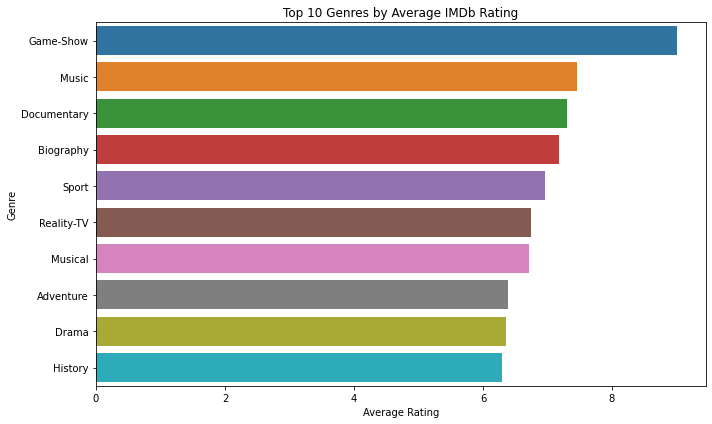

In [1081]:

# Group by genre and calculate average rating
genre_ratings = tmdb_clean.groupby("primary_genre")["averagerating"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index)
plt.title("Top 10 Genres by Average IMDb Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


The highest rated genre is Game Show, followed by Music, Documentary, and Biography. 
These genres may likely be favored for their entertainment value, emotional impact, and real life relevance.
In contrast, History, Drama, and Adventure received lower average ratings possibly due to slower pacing or predictable storylines.
This shows that people enjoy movies that feel real, emotional, or entertaining more than serious story heavy films


### Runtime vs. Rating Scatter ploy

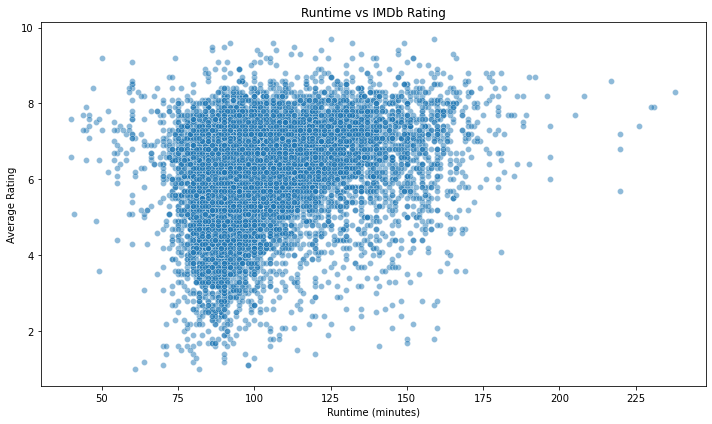

In [1082]:
# Filter to remove outliers
filtered = imdb_clean[(imdb_clean["runtime_minutes"] < 240) & (imdb_clean["numvotes"] > 500)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x="runtime_minutes", y="averagerating", alpha=0.5)
plt.title("Runtime vs IMDb Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


Most movies are between 80 to 125minutes long. 
The highest concentration of highly rated movies (7–9 rating) also fall within this runtime range.
There's no strong trend showing that longer movies are rated higher but Very short movies (under 70 min) tend to get lower ratings.
Extremely long movies (over 150 min) are rare and don’t consistently score higher.
Therefore, movies with runtimes between 80–125 minutes tend to be popular and well-rated.
Going too short may risk being seen as underdeveloped, while going too long doesn’t guarantee higher ratings.



### Average Ratings by year

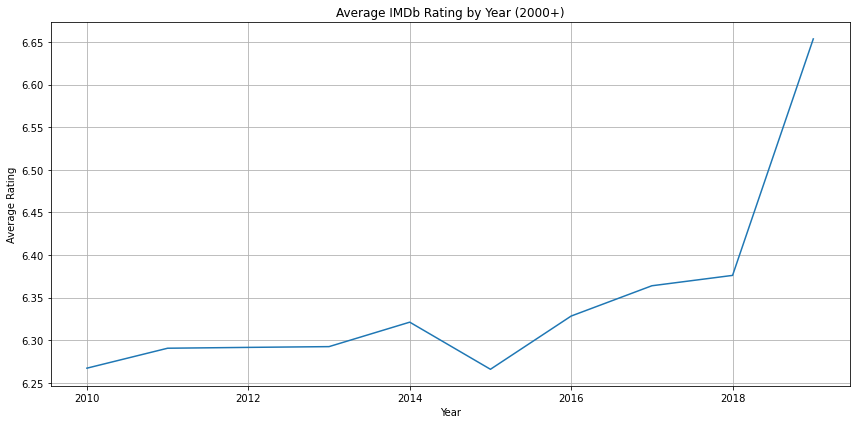

In [1083]:
# Drop null years and filter recent years only
yearly_ratings = imdb_clean.dropna(subset=["start_year"])
recent = yearly_ratings[yearly_ratings["start_year"].astype(int) >= 2000]

# Group and plot
avg_by_year = recent.groupby("start_year")["averagerating"].mean()

plt.figure(figsize=(12, 6))
avg_by_year.plot()
plt.title("Average IMDb Rating by Year (2000+)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


Between 2010 and 2018, average ratings stayed relatively stable, ranging between 6.25 and 6.40
From around 2016, there was a slow rise in ratings and then a sharp spike in 2019. This sharp spike may suggest either improved audience satisfaction or fewer poorly rated films that year. 

#### 2.2: ***Revenue Insights***
Using merged dataset( IMBD and Box office mojo data) to show genre vs revenue, rating vs revenue, runtime vs revenue

### Top 10 movies by worlwide revenue



In [1084]:
bom[["title", "worldwide_gross"]].sort_values(by="worldwide_gross", ascending=False).head(10)


,title,worldwide_gross
727,Marvel's The Avengers,"1,518,900,000"
1875,Avengers: Age of Ultron,"1,405,400,000"
3080,Black Panther,"1,347,000,000"
328,Harry Potter and the Deathly Hallows Part 2,"1,341,500,000"
2758,Star Wars: The Last Jedi,"1,332,600,000"
3081,Jurassic World: Fallen Kingdom,"1,309,500,000"
1127,Frozen,"1,276,400,000"
2759,Beauty and the Beast (2017),"1,263,500,000"
3082,Incredibles 2,"1,242,800,000"
1128,Iron Man 3,"1,214,800,000"


Marvel, Harry Potter, Star Wars and Jurassic World films brought in the most revenue globally.
They are  all franchise based, visually spectacular, and come from powerhouse studios like  Disney, Marvel and Warner Bros.
This means that Big franchises with strong brand recognition and global fanbases dominate box office earnings.


### Total Revenue by Year

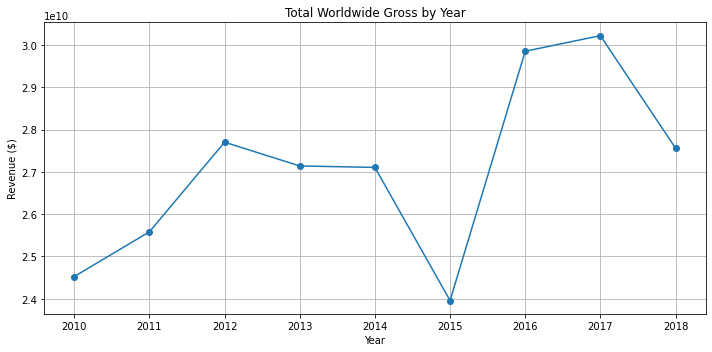

In [1085]:
revenue_by_year = bom.groupby("year")["worldwide_gross"].sum().reset_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(revenue_by_year["year"], revenue_by_year["worldwide_gross"], marker='o')
plt.title("Total Worldwide Gross by Year")
plt.xlabel("Year")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


There was a steady growth in global revenue from 2010 to 2012 and a sharp decline in 2015 (possibly due to fewer big hit releases).
A Sharp increase in 2016 to 2017 was also witnessed, with peak earnings in 2017 and slight drop in 2018.
This changes show that Movie releases are sensitive to timing, major releases, and global events.
Years with multiple big hit releases (e.g, 2016 to 2017) perform significantly better.

### Top Studios by Total Gross

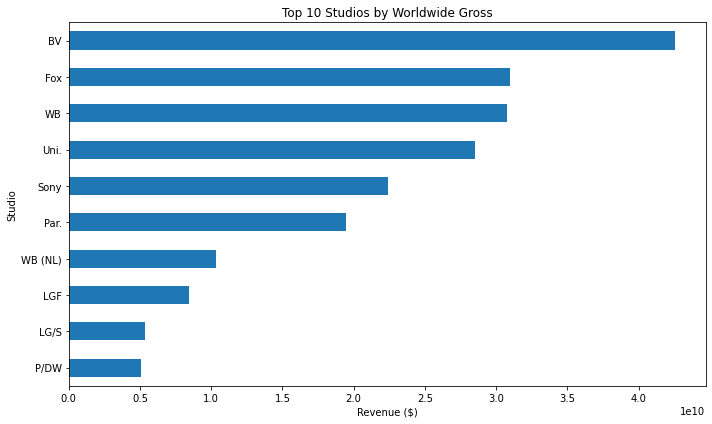

In [1086]:
top_studios = bom.groupby("studio")["worldwide_gross"].sum().sort_values(ascending=False).head(10)

top_studios.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Studios by Worldwide Gross")
plt.xlabel("Revenue ($)")
plt.ylabel("Studio")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Powerhouse studios like BV (Buena Vista/Disney), Fox, and WB (Warner Bros) dominate in revenue. These studios consistently produce high grossing films which indicates strong distribution networks, popular franchises, and large audiences

## STEP 3: ***RECOMMENDATIONS***

### 1: Invest in Reality-Based and Musical Genres
Based on IMDb ratings, Game Shows, Music, Documentaries, and Biographies are the highest-rated genres.
Focus on producing films in these categories to align with current viewer preferences and build credibility.

### 2: Aim for a Runtime Between 80–125 Minutes
Most highly rated films fall within the 80 to 125 minute range, and very short or very long films receive lower ratings.
Targeting this runtime range will balance viewer engagement and satisfaction.

### 3: Release Films in Peak Earning Periods & Learn from Top Studios
The highest movie earnings happened in 2016 and 2017, and studios like Disney (BV) and Warner Bros (WB) made the most money overall. 
Focus on planning movie releases during strong earning years and studying what the top studios did right, like the type of movies they made and when they released them.